문제 1) 가장 무더웠던 날이 언제이며, 이날의 평균 기온, 평균풍속.최대풍속을 구하시오.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [3]:
from google.colab import files
file_uploaded = files.upload()

Saving weather.csv to weather (1).csv


In [4]:
plt.rc('font', family = 'NanumBarunGothic')

In [5]:
 weather = pd.read_csv('weather.csv', encoding = 'CP949')
 weather

,일시,평균기온,최대풍속,평균풍속
0,2010-08-01,28.7,8.3,3.4
1,2010-08-02,25.2,8.7,3.8
2,2010-08-03,22.1,6.3,2.9
3,2010-08-04,25.3,6.6,4.2
4,2010-08-05,27.2,9.1,5.6
...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7
3649,2020-07-28,21.9,4.5,1.6
3650,2020-07-29,21.6,3.2,1.0
3651,2020-07-30,22.9,9.7,2.4


In [6]:
weather.shape

(3653, 4)

In [7]:
weather.head

<bound method NDFrame.head of               일시  평균기온  최대풍속  평균풍속
0     2010-08-01  28.7   8.3   3.4
1     2010-08-02  25.2   8.7   3.8
2     2010-08-03  22.1   6.3   2.9
3     2010-08-04  25.3   6.6   4.2
4     2010-08-05  27.2   9.1   5.6
...          ...   ...   ...   ...
3648  2020-07-27  22.1   4.2   1.7
3649  2020-07-28  21.9   4.5   1.6
3650  2020-07-29  21.6   3.2   1.0
3651  2020-07-30  22.9   9.7   2.4
3652  2020-07-31  25.7   4.8   2.5

[3653 rows x 4 columns]>

In [8]:
weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      3653 non-null   object 
 1   평균기온    3653 non-null   float64
 2   최대풍속    3649 non-null   float64
 3   평균풍속    3647 non-null   float64
dtypes: float64(3), object(1)
memory usage: 114.3+ KB


In [9]:
weather.describe() #데이터프레임 통계

,평균기온,최대풍속,평균풍속
count,3653.000000,3649.000000,3647.000000
mean,12.942102,7.911099,3.936441
std,8.538507,3.029862,1.888473
min,-9.000000,2.000000,0.200000
25%,5.400000,5.700000,2.500000
50%,13.800000,7.600000,3.600000
75%,20.100000,9.700000,5.000000
max,31.300000,26.000000,14.900000


In [12]:
weather.isnull().sum() #결측치 구하기

일시      0
평균기온    0
최대풍속    4
평균풍속    6
dtype: int64

In [13]:
weather['평균풍속'].min() #최소

0.2

In [14]:
wt2 = weather.dropna(how = 'any') #결측치 제거 (NULL제거)
wt2.info

<bound method DataFrame.info of               일시  평균기온  최대풍속  평균풍속
0     2010-08-01  28.7   8.3   3.4
1     2010-08-02  25.2   8.7   3.8
2     2010-08-03  22.1   6.3   2.9
3     2010-08-04  25.3   6.6   4.2
4     2010-08-05  27.2   9.1   5.6
...          ...   ...   ...   ...
3648  2020-07-27  22.1   4.2   1.7
3649  2020-07-28  21.9   4.5   1.6
3650  2020-07-29  21.6   3.2   1.0
3651  2020-07-30  22.9   9.7   2.4
3652  2020-07-31  25.7   4.8   2.5

[3646 rows x 4 columns]>

In [24]:
#가장 무더웠던 날의 온도
hot =wt2['평균기온'].max()


In [23]:
wt2['일시'][wt2['평균기온'] == wt2['평균기온'].max()]
#가장 무더웠던 날

1103    2013-08-08
Name: 일시, dtype: object

In [25]:
hottest = wt2.loc[wt2['평균기온'] == hot]
hottest

,일시,평균기온,최대풍속,평균풍속
1103,2013-08-08,31.3,7.8,4.6


In [29]:
#울릉도의 평균기온이 30도가 넘는 날을 찾아, 이날의 기상데이터를 나열해보시오.
hotdays = wt2[wt2['평균기온'] > 30]
hotdays

,일시,평균기온,최대풍속,평균풍속
1103,2013-08-08,31.3,7.8,4.6
1104,2013-08-09,30.6,9.9,6.4
1105,2013-08-10,30.6,7.4,3.8
2913,2018-07-23,30.5,6.5,1.6
2925,2018-08-04,30.3,5.8,3.0


#울릉도는 몇 월에 바람이 가장 강할까? (막대그래프)

In [42]:
wt2['월'] = wt2['일시'].str[5:7]
wt2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,일시,평균기온,최대풍속,평균풍속,월
0,2010-08-01,28.7,8.3,3.4,08
1,2010-08-02,25.2,8.7,3.8,08
2,2010-08-03,22.1,6.3,2.9,08
3,2010-08-04,25.3,6.6,4.2,08
4,2010-08-05,27.2,9.1,5.6,08
...,...,...,...,...,...
3648,2020-07-27,22.1,4.2,1.7,07
3649,2020-07-28,21.9,4.5,1.6,07
3650,2020-07-29,21.6,3.2,1.0,07
3651,2020-07-30,22.9,9.7,2.4,07


In [39]:
wt2.groupby('월')['평균풍속'].mean()

월
01    3.757419
02    3.946786
03    4.390291
04    4.630303
05    4.219355
06    3.461000
07    3.877419
08    3.596129
09    3.661667
10    3.961613
11    3.930667
12    3.817097
Name: 평균풍속, dtype: float64

In [40]:
wt2.groupby('월')['평균풍속'].max()

월
01    11.6
02     9.7
03    12.0
04    12.1
05    10.5
06    11.1
07    11.8
08    14.9
09    12.5
10    12.7
11    10.9
12    11.6
Name: 평균풍속, dtype: float64

In [44]:
wt2.groupby('월')['최대풍속'].mean()

월
01    8.158065
02    8.225357
03    8.863107
04    9.287542
05    8.548710
06    6.945667
07    7.322581
08    6.853226
09    6.896333
10    7.766774
11    8.013333
12    8.045484
Name: 최대풍속, dtype: float64

In [49]:
a = wt2.groupby('월')['최대풍속'].mean()
a[a.max()==a]


월
04    9.287542
Name: 최대풍속, dtype: float64

In [53]:
a

월
01    8.158065
02    8.225357
03    8.863107
04    9.287542
05    8.548710
06    6.945667
07    7.322581
08    6.853226
09    6.896333
10    7.766774
11    8.013333
12    8.045484
Name: 최대풍속, dtype: float64

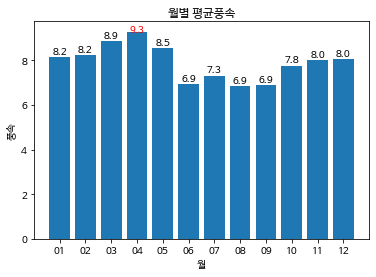

In [80]:
# x축 월, y충 평균풍속
x = a.index.tolist()
y = a.tolist()
bar = plt.bar(x,y)
plt.title('월별 평균풍속')
plt.xlabel('월')
plt.ylabel('풍속')
for i in range(0, len(x)):
  if y[i] == max(y) :
    plt.text(i,y[i], round(y[i],1), color='red', ha = 'center')
  else:
    plt.text(i,y[i], round(y[i],1), ha = 'center', va = 'bottom')
# for rect in bar:
#     height = rect.get_height()
#     plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 9)